<a href="https://colab.research.google.com/github/alibagheribardi/Regression/blob/main/Relocating_reg_plane.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

## ---- Diastolic (Not Systolic) Blood Pressure Data ---
## ---- Normal: Less than 80 mmHg
## ---- Elevated: 80–89 mmHg
## ---- Stage 1 Hypertension: 80–89 mmHg
## ---- Stage 2 Hypertension: 90 mmHg or higher

                            Model      MSE  R² Score
0               Linear Regression  23.9175    0.8520
1       Rotated Linear Regression   0.0000    1.0000
2        Fourier Basis Regression  22.0768    0.8634
3  Polynomial Regression (deg 15)  24.5205    0.8482
4           KNN Regression (k=10)  22.7941    0.8589


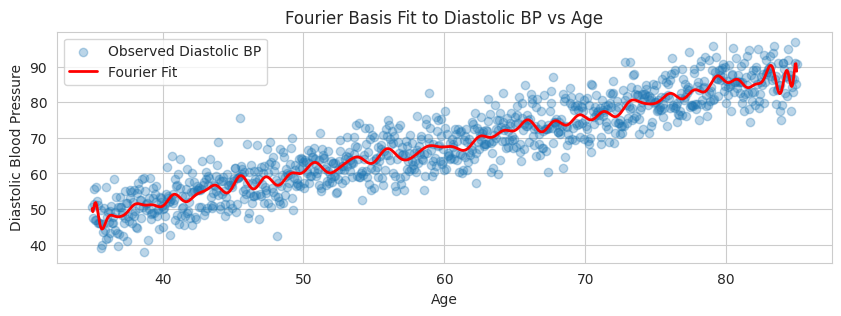

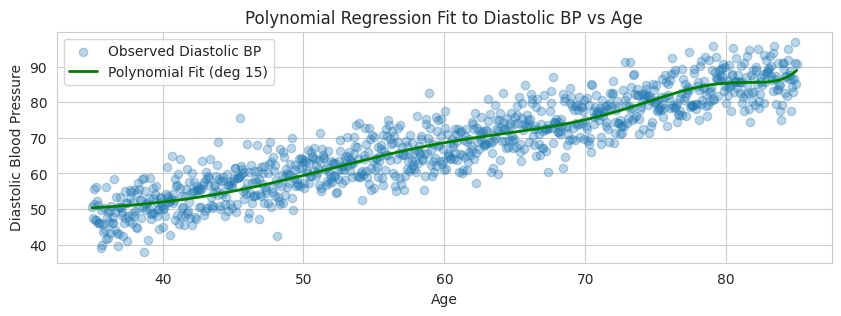

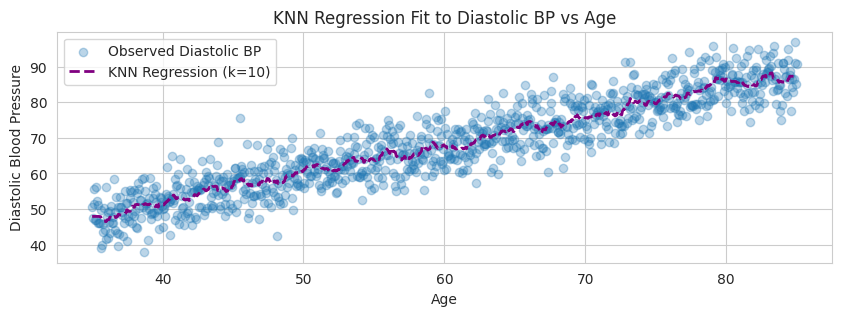

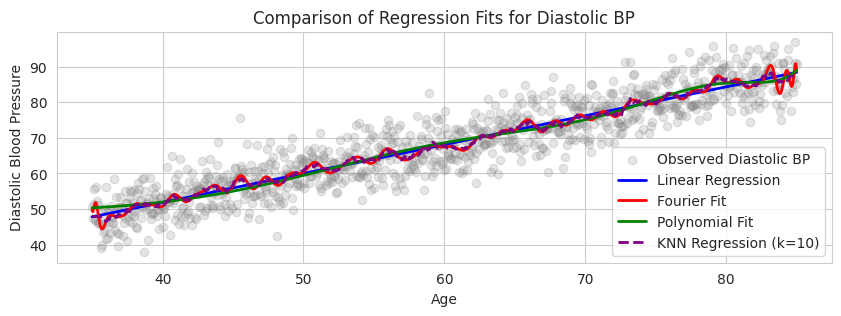

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor

# --- Simulated Diastolic (Not Systolic) Blood Pressure Data ---
np.random.seed(42)
age = np.linspace(35, 85, 1000)
diastolic_bp = 0.8 * age + 20 + np.random.normal(0, 5, size=age.shape)

# --- Reshape for Regression ---
age_reshaped = age.reshape(-1, 1)

# --- Original Linear Regression ---
model = LinearRegression()
model.fit(age_reshaped, diastolic_bp)
predictions = model.predict(age_reshaped)

# --- Rotated Linear Regression via Procrustes ---
Q_age = age_reshaped / np.linalg.norm(age)
Q_bp = diastolic_bp.reshape(-1, 1) / np.linalg.norm(diastolic_bp)
M = Q_bp @ Q_age.T
U, _, Vt = np.linalg.svd(M)
Rotation = U @ Vt
Rotated_age = Rotation @ Q_age

model_rotated = LinearRegression()
model_rotated.fit(Rotated_age, diastolic_bp)
Rotated_predictions = model_rotated.predict(Rotated_age)

# --- Multi-Period Fourier Basis with Trend ---
def multi_period_fourier_basis(t, max_n=500, periods=[1000, 2000, 3000, 4000, 5000]):
    basis = [np.ones_like(t)]  # Intercept
    basis.append(t)            # Linear trend
    for period in periods:
        for n in range(1, max_n + 1):
            basis.append(np.cos(2 * np.pi * n * t / period))
            basis.append(np.sin(2 * np.pi * n * t / period))
    return np.column_stack(basis)

# --- Fourier Basis Regression ---
X_fourier = multi_period_fourier_basis(age, max_n=500, periods=[1000, 2000, 3000, 4000, 5000])
model_fourier = LinearRegression()
model_fourier.fit(X_fourier, diastolic_bp)
predicted_fourier = model_fourier.predict(X_fourier)

# --- Polynomial Regression ---
poly_degree = 15
poly = PolynomialFeatures(degree=poly_degree, include_bias=False)
X_poly = poly.fit_transform(age_reshaped)

model_poly = LinearRegression()
model_poly.fit(X_poly, diastolic_bp)
predicted_poly = model_poly.predict(X_poly)

# --- K-Nearest Neighbors Regression ---
knn_model = KNeighborsRegressor(n_neighbors=22)
knn_model.fit(age_reshaped, diastolic_bp)
predicted_knn = knn_model.predict(age_reshaped)

# --- Compute All Metrics ---
mse_original = mean_squared_error(diastolic_bp, predictions)
r2_original = r2_score(diastolic_bp, predictions)

mse_rotated = mean_squared_error(diastolic_bp, Rotated_predictions)
r2_rotated = r2_score(diastolic_bp, Rotated_predictions)

mse_fourier = mean_squared_error(diastolic_bp, predicted_fourier)
r2_fourier = r2_score(diastolic_bp, predicted_fourier)

mse_poly = mean_squared_error(diastolic_bp, predicted_poly)
r2_poly = r2_score(diastolic_bp, predicted_poly)

mse_knn = mean_squared_error(diastolic_bp, predicted_knn)
r2_knn = r2_score(diastolic_bp, predicted_knn)

import pandas as pd

# --- Collect all regression results in a dictionary ---
metrics_data = {
    "Model": [
        "Linear Regression",
        "Rotated Linear Regression",
        "Fourier Basis Regression",
        f"Polynomial Regression (deg {poly_degree})",
        "KNN Regression (k=10)"
    ],
    "MSE": [
        mse_original,
        mse_rotated,
        mse_fourier,
        mse_poly,
        mse_knn
    ],
    "R² Score": [
        r2_original,
        r2_rotated,
        r2_fourier,
        r2_poly,
        r2_knn
    ]
}

# --- Create DataFrame and round values ---
metrics_df = pd.DataFrame(metrics_data).round(4)

# --- Display the table ---
print(metrics_df)


# --- Individual Fourier Fit Plot ---
plt.figure(figsize=(10, 3))
plt.scatter(age, diastolic_bp, alpha=0.3, label='Observed Diastolic BP')
plt.plot(age, predicted_fourier, color='red', linewidth=2, label='Fourier Fit')
plt.xlabel('Age')
plt.ylabel('Diastolic Blood Pressure')
plt.title('Fourier Basis Fit to Diastolic BP vs Age')
plt.legend()
plt.grid(True)
plt.show()

# --- Individual Polynomial Fit Plot ---
plt.figure(figsize=(10, 3))
plt.scatter(age, diastolic_bp, alpha=0.3, label='Observed Diastolic BP')
plt.plot(age, predicted_poly, color='green', linewidth=2, label='Polynomial Fit (deg {})'.format(poly_degree))
plt.xlabel('Age')
plt.ylabel('Diastolic Blood Pressure')
plt.title('Polynomial Regression Fit to Diastolic BP vs Age')
plt.legend()
plt.grid(True)
plt.show()

# --- Individual KNN Regression Plot ---
plt.figure(figsize=(10, 3))
plt.scatter(age, diastolic_bp, alpha=0.3, label='Observed Diastolic BP')
plt.plot(age, predicted_knn, color='purple', linewidth=2, linestyle='--', label='KNN Regression (k=10)')
plt.xlabel('Age')
plt.ylabel('Diastolic Blood Pressure')
plt.title('KNN Regression Fit to Diastolic BP vs Age')
plt.legend()
plt.grid(True)
plt.show()


# --- All Fits Comparison Plot ---
plt.figure(figsize=(10, 3))
plt.scatter(age, diastolic_bp, label="Observed Diastolic BP", color='gray', alpha=0.2)
plt.plot(age, predictions, label="Linear Regression", color='blue', linewidth=2)
plt.plot(age, predicted_fourier, label="Fourier Fit", color='red', linewidth=2)
plt.plot(age, predicted_poly, label="Polynomial Fit", color='green', linewidth=2)
plt.plot(age, predicted_knn, label="KNN Regression (k=10)", color='purple', linestyle='--', linewidth=2)
plt.xlabel("Age")
plt.ylabel("Diastolic Blood Pressure")
plt.title("Comparison of Regression Fits for Diastolic BP")
plt.grid(True)
plt.legend()
plt.show()


                            Model      MSE  R² Score
0               Linear Regression  23.9175    0.8520
1       Rotated Linear Regression   0.0000    1.0000
2        Fourier Basis Regression  22.0768    0.8634
3  Polynomial Regression (deg 15)  24.5205    0.8482
4           KNN Regression (k=10)  22.7941    0.8589
{'Linear Regression': {'MSE': 23.9175, 'R² Score': 0.852}, 'Rotated Linear Regression': {'MSE': 0.0, 'R² Score': 1.0}, 'Fourier Basis Regression': {'MSE': 22.0768, 'R² Score': 0.8634}, 'Polynomial Regression (deg 15)': {'MSE': 24.5205, 'R² Score': 0.8482}, 'KNN Regression (k=10)': {'MSE': 22.7941, 'R² Score': 0.8589}}


In [ ]:
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Load and sort dataset by increasing target value
data = load_diabetes()
X = data.data
y = data.target


# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, shuffle=True, random_state=42
)

# QR decomposition of training set
Q_X, _ = np.linalg.qr(X_train)

# Stack Q_X with y_train as last column
vecs = np.hstack((Q_X[:, :-1], y_train.reshape(-1, 1)))

# QR decomposition of stacked matrix
Q_y, _ = np.linalg.qr(vecs)

# Compute rotation matrix
Rotation = Q_y @ Q_X.T
X_rotated = Rotation @ X_train

# Fit linear regression in rotated space
linear_regression = LinearRegression()
linear_regression.fit(X_rotated, y_train)


# Predict on test set using updated training neighborhood
dist_matrix = euclidean_distances(X_test, X_train)
neighbors = np.argsort(dist_matrix, axis=1)

y_pred = []

for sample, nbhd in zip(X_test, neighbors):
    X_train_updated = X_train.copy()
    X_train_updated[nbhd[0]] = sample  # inject test sample into training set
    sample_rotated = (Rotation @ X_train_updated)[nbhd[0]]  # get rotated version of test sample
    val = linear_regression.predict(sample_rotated.reshape(1, -1))[0]
    y_pred.append(val)

# Compute metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error Rotated): {mse:.2f}")
print(f"R² Score (Rotated): {r2:.4f}")


Mean Squared Error Rotated): 5384.91
R² Score (Rotated): 0.1197


In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# Define and fit KNN Regressor
knn = KNeighborsRegressor(n_neighbors=k_opt)
knn.fit(X_train, y_train)

# Predict on the test set
knn_pred = knn.predict(X_test)

# Compute metrics
knn_mse = mean_squared_error(y_test, knn_pred)
knn_r2 = r2_score(y_test, knn_pred)

print(f"[KNN Regressor] Mean Squared Error (MSE): {knn_mse:.2f}")
print(f"[KNN Regressor] R² Score: {knn_r2:.4f}")


[KNN Regressor] Mean Squared Error (MSE): 2646.34
[KNN Regressor] R² Score: 0.5674


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Set seed for reproducibility
np.random.seed(42)

# Generate 500 samples, 10 features
n_samples = 500
n_features = 10

# Create random feature matrix
X = np.random.randn(n_samples, n_features)

# Define a true weight vector for the "true" hyperplane
true_weights = np.random.randn(n_features)

# Generate target values based on linear combination + small Gaussian noise
y = X @ true_weights + np.random.randn(n_samples) * 0.5  # noise level = 0.5

# Print shape
print(f"X shape: {X.shape}, y shape: {y.shape}")

# Fit Linear Regression
reg = LinearRegression()
reg.fit(X, y)

# Predict and evaluate
y_pred = reg.predict(X)
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)

print(f"R² Score: {r2:.4f}")
print(f"MSE: {mse:.4f}")


X shape: (500, 10), y shape: (500,)
R² Score: 0.9708
MSE: 0.2307


In [ ]:
# --- Standardize Features ---
scaler = StandardScaler()
X = scaler.fit_transform(X)

# --- Split into Train and Test ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, shuffle=True, random_state=42
)

# --- QR Decomposition of X_train ---
Q_X, _ = np.linalg.qr(X_train)

# --- Stack Q_X with y_train as last column ---
vecs = np.hstack((Q_X[:, 1:], y_train.reshape(-1, 1)))

# --- QR Decomposition of the new stacked matrix ---
Q_y, _ = np.linalg.qr(vecs)

# --- Compute Rotation Matrix ---
Rotation = Q_y @ Q_X.T
X_rotated = Rotation @ X_train

# --- Fit Linear Regression on Rotated Data ---
linear_regression = LinearRegression()
linear_regression.fit(X_rotated, y_train)

# --- Predict with Rotation per test sample neighborhood ---
dist_matrix = euclidean_distances(X_test, X_train)
neighbors = np.argsort(dist_matrix, axis=1)

y_pred = []

for sample, nbhd in zip(X_test, neighbors):
    X_train_updated = X_train.copy()
    X_train_updated[nbhd[0]] = sample  # replace one neighbor with test sample
    sample_rotated = (Rotation @ X_train_updated)[nbhd[0]]
    val = linear_regression.predict(sample_rotated.reshape(1, -1))[0]
    y_pred.append(val)

# --- Evaluate ---
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (Rotated): {mse:.2f}")
print(f"R² Score (Rotated): {r2:.4f}")


Mean Squared Error (Rotated): 4.93
R² Score (Rotated): 0.1495
